<h1>M. Nielsen, Chapter 6, first cnn model</h1>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [7]:
from matplotlib import pyplot as plt

In [9]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [11]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [13]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


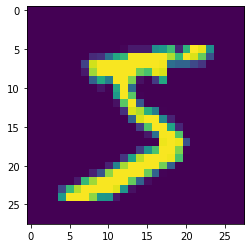

img label: 5


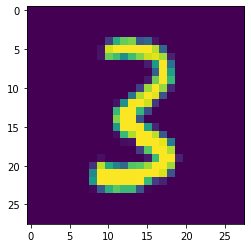

img label: 3


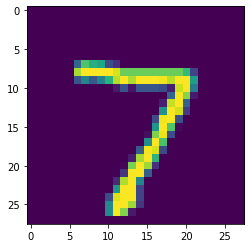

img label: 7


In [15]:
###############################################
#    checking data format:
###############################################
plt.imshow(train_x[0], interpolation='none')
plt.show()
print('img label:', train_y[0])

plt.imshow(val_x[0], interpolation='none')
plt.show()
print('img label:', val_y[0])

plt.imshow(test_x[0], interpolation='none')
plt.show()
print('img label:', test_y[0])


<h1>Trying Implementing the first CNN model as described in M. Nielsen, Chapter 6</h1>	

In [12]:
# first CNN model, M. Nielsen, Chapter 6

# >> net = Network([
#         ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
#                       filter_shape=(20, 1, 5, 5), 
#                       poolsize=(2, 2)),
#         FullyConnectedLayer(n_in=20*12*12, n_out=100),
#         SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
# >>> net.SGD(training_data, 60, mini_batch_size, 0.1, 
#             validation_data, test_data) 

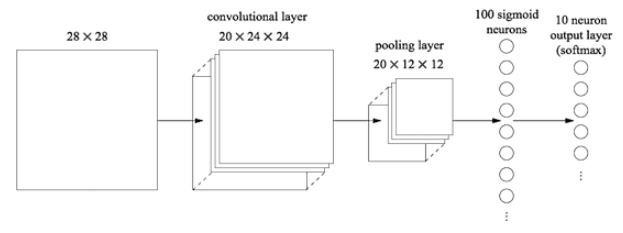

<h1>Reshape data</h1>

In [16]:
# reshape data
train_x = train_x.reshape(np.shape(train_x)[0], np.shape(train_x)[1], np.shape(train_x)[2], 1)
val_x = val_x.reshape(np.shape(val_x)[0], np.shape(val_x)[1], np.shape(val_x)[2], 1)
test_x = test_x.reshape(np.shape(test_x)[0], np.shape(test_x)[1], np.shape(test_x)[2], 1)

train_y = tf.one_hot(train_y.astype(np.int32), depth=10)
val_y = tf.one_hot(val_y.astype(np.int32), depth=10)
test_y = tf.one_hot(test_y.astype(np.int32), depth=10)

<h1>Build Network model</h1>

In [17]:
################################################################
#   first CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
################################################################

################################################################
# construct netwoek model

input_shape = (28, 28, 1)

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.sigmoid,
        input_shape=input_shape
    )
)

model.add(
    tf.keras.layers.MaxPool2D(
        strides=(2,2)
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        100,
        activation=tf.nn.sigmoid,
        kernel_initializer=tf.keras.initializers.RandomNormal(
            stddev=1.0),
        bias_initializer=tf.keras.initializers.RandomNormal(
            stddev=1.0)
    )
)

model.add(
    tf.keras.layers.Dense(
        10,
        activation=tf.nn.softmax,
    )
)
################################################################

################################################################
# compile model
n_eph = 60
eta = 0.1
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               288100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
_________________________________________________________________


<h1>Train Network</h1>

In [21]:
################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn1\cnn1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
################################################################
#    train model  (how do i randomize mini_batches?)
batch_size = 10
n_eph = 60

ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################

Epoch 1/60
5000/5000 [==============================] - 23s 5ms/step - loss: 0.2612 - accuracy: 0.9199 - val_loss: 0.2162 - val_accuracy: 0.9346
Epoch 2/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.2070 - accuracy: 0.9361 - val_loss: 0.1687 - val_accuracy: 0.9511
Epoch 3/60
5000/5000 [==============================] - 25s 5ms/step - loss: 0.1722 - accuracy: 0.9463 - val_loss: 0.1492 - val_accuracy: 0.9566
Epoch 4/60
5000/5000 [==============================] - 25s 5ms/step - loss: 0.1479 - accuracy: 0.9536 - val_loss: 0.1417 - val_accuracy: 0.9571
Epoch 5/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1311 - accuracy: 0.9586 - val_loss: 0.1267 - val_accuracy: 0.9599
Epoch 6/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1167 - accuracy: 0.9635 - val_loss: 0.1138 - val_accuracy: 0.9665
Epoch 7/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.1053 - accuracy: 0.9675 - val_loss: 0.1117 - val_ac

5000/5000 [==============================] - 27s 5ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.0929 - val_accuracy: 0.9788
Epoch 58/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.0941 - val_accuracy: 0.9785
Epoch 59/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0942 - val_accuracy: 0.9780
Epoch 60/60
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0943 - val_accuracy: 0.9779
total time: 1610.464509487152
1/1 [==============================] - 0s 420ms/step - loss: 0.0824 - accuracy: 0.9768


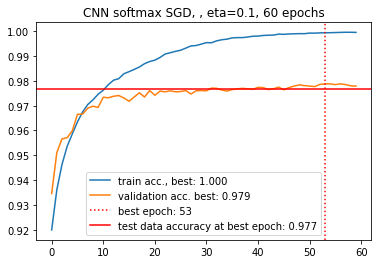

In [22]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN softmax SGD, , eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

<h1>Max accuracy= 97.7%</h1>
<h1>Total time= 1610s</h1>

In [32]:
print(acc)

[0.9199000000953674, 0.9360799789428711, 0.9462800025939941, 0.9535999894142151, 0.958620011806488, 0.9634600281715393, 0.9674800038337708, 0.9704800248146057, 0.9723399877548218, 0.97461998462677, 0.9762399792671204, 0.9785199761390686, 0.9802799820899963, 0.98089998960495, 0.9828799962997437, 0.9837200045585632, 0.9846199750900269, 0.9855999946594238, 0.9869400262832642, 0.987820029258728, 0.9883599877357483, 0.9894400238990784, 0.9908400177955627, 0.9913600087165833, 0.991919994354248, 0.99235999584198, 0.9932199716567993, 0.9940999746322632, 0.9942600131034851, 0.9948400259017944, 0.9954400062561035, 0.9953799843788147, 0.9961599707603455, 0.9965999722480774, 0.9968400001525879, 0.9973400235176086, 0.9974600076675415, 0.9974600076675415, 0.9976999759674072, 0.9980000257492065, 0.9980800151824951, 0.9983199834823608, 0.998420000076294, 0.9984800219535828, 0.9988600015640259, 0.9987800121307373, 0.9989200234413147, 0.9990000128746033, 0.9990599751472473, 0.9990400075912476, 0.9992799

In [34]:
print(loss)

[0.26118582487106323, 0.2070184051990509, 0.17219461500644684, 0.1478556990623474, 0.1311149299144745, 0.11669888347387314, 0.10534115135669708, 0.09544402360916138, 0.08770991116762161, 0.08100392669439316, 0.07470093667507172, 0.06824921816587448, 0.0654488280415535, 0.062123846262693405, 0.05556374415755272, 0.052220217883586884, 0.04930388182401657, 0.046005360782146454, 0.04262133687734604, 0.04019026458263397, 0.03780664876103401, 0.03543975204229355, 0.03211887180805206, 0.030386967584490776, 0.02892179600894451, 0.027433767914772034, 0.02516479790210724, 0.023457929491996765, 0.02225327119231224, 0.02092386782169342, 0.019139112904667854, 0.01851494051516056, 0.01723988726735115, 0.015873223543167114, 0.015480777248740196, 0.014011124148964882, 0.013469824567437172, 0.012828987091779709, 0.012045846320688725, 0.011383631266653538, 0.010974695906043053, 0.010352343320846558, 0.00975222047418356, 0.00930928997695446, 0.008709907531738281, 0.008396521210670471, 0.00808203592896461

In [36]:
print(val_acc)

[0.9345999956130981, 0.9510999917984009, 0.95660001039505, 0.957099974155426, 0.9599000215530396, 0.9664999842643738, 0.9666000008583069, 0.968999981880188, 0.9697999954223633, 0.9692999720573425, 0.9733999967575073, 0.9732000231742859, 0.973800003528595, 0.9740999937057495, 0.9731000065803528, 0.9718000292778015, 0.9735000133514404, 0.9751999974250793, 0.9735000133514404, 0.9761000275611877, 0.9742000102996826, 0.9758999943733215, 0.975600004196167, 0.9760000109672546, 0.975600004196167, 0.9757000207901001, 0.9761000275611877, 0.9746999740600586, 0.9760000109672546, 0.9761000275611877, 0.9760000109672546, 0.9771000146865845, 0.9769999980926514, 0.9763000011444092, 0.9758999943733215, 0.9764999747276306, 0.9768000245094299, 0.9769999980926514, 0.9768000245094299, 0.9765999913215637, 0.977400004863739, 0.9772999882698059, 0.9764999747276306, 0.9768000245094299, 0.9775000214576721, 0.9764000177383423, 0.9772999882698059, 0.9779000282287598, 0.9783999919891357, 0.9781000018119812, 0.97790

In [37]:
print(val_loss)

[0.21617703139781952, 0.1686761975288391, 0.1491757482290268, 0.14174319803714752, 0.12670786678791046, 0.11384280771017075, 0.11166567355394363, 0.1121368557214737, 0.10157711058855057, 0.10456801950931549, 0.09711351990699768, 0.09298446774482727, 0.09578917920589447, 0.09307768940925598, 0.09236733615398407, 0.09454682469367981, 0.09504245966672897, 0.090927854180336, 0.0912531390786171, 0.08922818303108215, 0.0950864851474762, 0.08789088577032089, 0.0900401696562767, 0.08725743740797043, 0.08723112940788269, 0.09072268754243851, 0.08943673968315125, 0.08928611129522324, 0.09048707038164139, 0.0887715294957161, 0.09081185609102249, 0.08863714337348938, 0.08758743107318878, 0.08983729779720306, 0.08868655562400818, 0.08947539329528809, 0.0914371982216835, 0.0924682542681694, 0.09114769101142883, 0.09001149982213974, 0.09187109023332596, 0.09058050811290741, 0.09183619171380997, 0.09111347794532776, 0.093060702085495, 0.09278135746717453, 0.09173194319009781, 0.0955759733915329, 0.091